## Results from coordination games

In [1]:
import pandas as pd
import numpy as np
import mesa
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Graphs font
plt.rcParams['font.family'] = 'Georgia'

In [2]:
# Import the game
from coordination_game import coordination_agent, coordination_model

In [3]:
# Set the number of agents and other parameters
N = 1000  # Number of agents
alpha = 6
theta = 1/2
convincement_type = "ticker"  # Placeholder since you're ignoring this for now

# Initialize the model
model = coordination_model(N, alpha, theta, convincement_type)

# Run the model for a specified number of steps
num_steps = 100
for i in range(num_steps):
    model.step()

# After running, you can access agent data for analysis
for agent in model.schedule.agents:
    print(f"Agent {agent.unique_id}:")
    print(f"  Group: {agent.assigned_group}")
    print(f"  Consumption History: {agent.history}")
    print(f"  Utilities: {agent.utilities}")


Agent 992:
  Group: Anti - environment
  Consumption History: [66.44940410508946, 68.57306162096961, 70.00407183350453, 70.00407183350453, 75.73281755842224, 75.73281755842224, 98.41749662594162, 98.41749662594162, 98.41749662594162, 98.41749662594162, 98.41749662594162, 98.41749662594162, 108.13671838548397, 108.13671838548397, 108.13671838548397, 108.13671838548397, 108.13671838548397, 108.13671838548397, 108.13671838548397, 108.13671838548397, 108.13671838548397, 108.13671838548397, 108.13671838548397, 118.08613537523524, 118.08613537523524, 140.41749662514655, 140.41749662514655, 140.41749662514655, 140.41749662514655, 140.41749662514655, 159.80877552682574, 159.80877552682574, 159.80877552682574, 177.30877552611753, 177.30877552611753, 178.4512854308059, 178.4512854308059, 178.4512854308059, 178.4512854308059, 178.4512854308059, 178.4512854308059, 194.80877552611815, 194.80877552611815, 194.80877552611815, 194.80877552611815, 194.80877552611815, 194.80877552611815, 213.45128543081

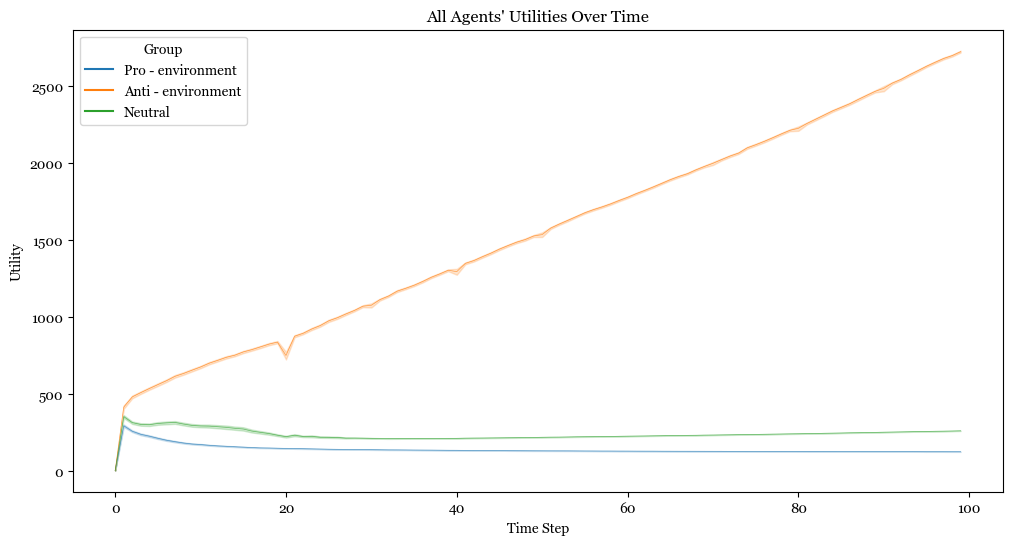

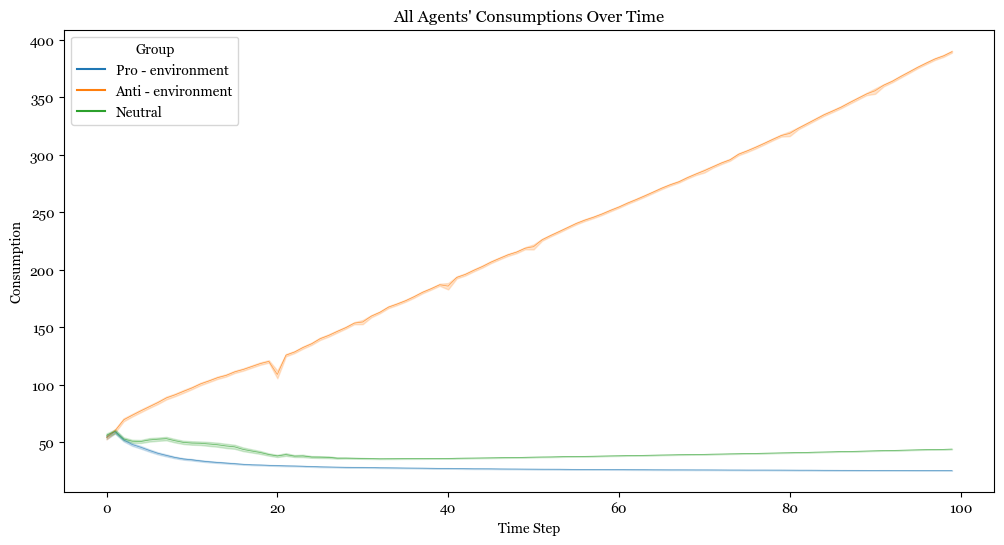

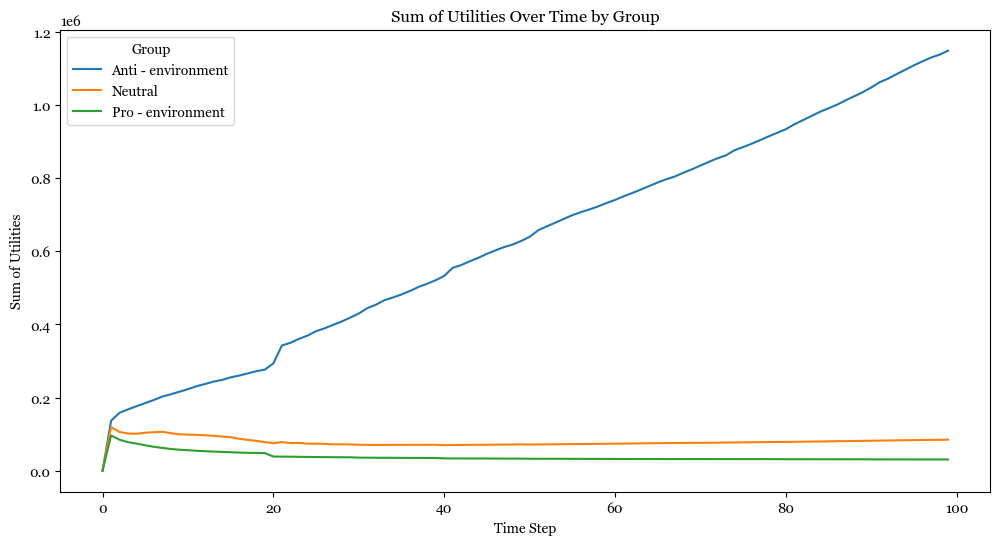

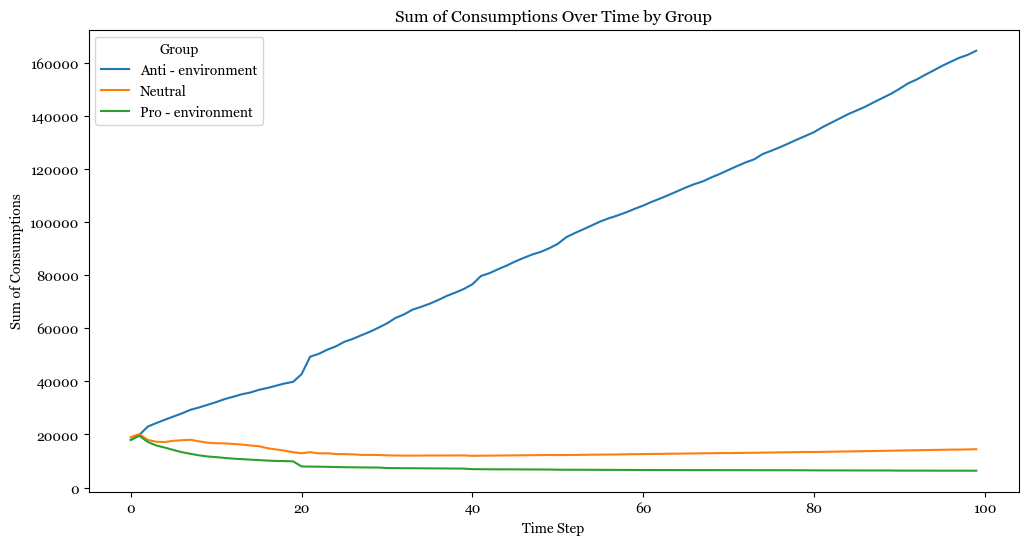

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Retrieve the collected data
agent_data = model.datacollector.get_agent_vars_dataframe()

# Reset index to get agent IDs and steps as columns
agent_data = agent_data.reset_index()

# Ensure no missing values in Utilities (fill with 0 if needed)
agent_data['Utility'] = agent_data['Utility'].fillna(0)

# Plot all agents' utilities over time, colored by group
plt.figure(figsize=(12, 6))
sns.lineplot(data=agent_data, x='Step', y='Utility', hue='Group', legend='full', linewidth=0.5, alpha=0.7)
plt.title("All Agents' Utilities Over Time")
plt.xlabel("Time Step")
plt.ylabel("Utility")
plt.legend(title='Group')
plt.show()

# Plot all agents' consumptions over time, colored by group
plt.figure(figsize=(12, 6))
sns.lineplot(data=agent_data, x='Step', y='Consumption', hue='Group', legend='full', linewidth=0.5, alpha=0.7)
plt.title("All Agents' Consumptions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Consumption")
plt.legend(title='Group')
plt.show()

# Group data by Step and Group for utilities
grouped_utilities = agent_data.groupby(['Step', 'Group'])['Utility'].sum().reset_index()

# Plot sum of utilities over time by group
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_utilities, x='Step', y='Utility', hue='Group', legend='full')
plt.title('Sum of Utilities Over Time by Group')
plt.xlabel('Time Step')
plt.ylabel('Sum of Utilities')
plt.legend(title='Group')
plt.show()

# Group data by Step and Group for consumptions
grouped_consumptions = agent_data.groupby(['Step', 'Group'])['Consumption'].sum().reset_index()

# Plot sum of consumptions over time by group
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_consumptions, x='Step', y='Consumption', hue='Group', legend='full')
plt.title('Sum of Consumptions Over Time by Group')
plt.xlabel('Time Step')
plt.ylabel('Sum of Consumptions')
plt.legend(title='Group')
plt.show()


In [5]:
agent_data

Step  AgentID               Group  Consumption      Utility
0         0        0   Pro - environment    54.338496     0.000000
1         0        1  Anti - environment    40.892170     0.000000
2         0        2  Anti - environment    40.627533     0.000000
3         0        3  Anti - environment    47.330099     0.000000
4         0        4  Anti - environment    63.646901     0.000000
...     ...      ...                 ...          ...          ...
99995    99      193  Anti - environment   391.951285  2737.533998
99996    99      908  Anti - environment   377.951285  2639.533998
99997    99      621             Neutral    45.005864   265.535185
99998    99      937             Neutral    45.180864   266.585185
99999    99      567  Anti - environment   388.451285  2713.033998

[100000 rows x 5 columns]

In [6]:
agent_data.loc[agent_data.Group == "Pro - environment"]

Step  AgentID              Group  Consumption     Utility
0         0        0  Pro - environment    54.338496    0.000000
5         0        5  Pro - environment    73.727407    0.000000
11        0       11  Pro - environment    57.008441    0.000000
12        0       12  Pro - environment    30.068565    0.000000
13        0       13  Pro - environment    58.089764    0.000000
...     ...      ...                ...          ...         ...
99967    99       15  Pro - environment    25.397322  123.861608
99974    99      467  Pro - environment    27.752662  135.638312
99976    99      457  Pro - environment    25.397322  123.861608
99980    99      383  Pro - environment    25.397322  123.861608
99981    99      466  Pro - environment    25.397322  123.861608

[27060 rows x 5 columns]

In [7]:
# Step 0 
step0 = agent_data.loc[agent_data.Step == 0]

# Step 99
step99 = agent_data.loc[agent_data.Step == 99]

In [9]:
step0.Group.value_counts()

Neutral               339
Anti - environment    331
Pro - environment     330
Name: Group, dtype: int64

In [10]:
step99.Group.value_counts()

Anti - environment    422
Neutral               328
Pro - environment     250
Name: Group, dtype: int64